In [7]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

n_dims = np.array([2,4,6,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70])
sample = 100

n = np.max(n_dims)
factor = np.array([20,50,80,100])
N = max(factor)*(n+1)
N_dims = factor[:,np.newaxis]*n_dims[:,np.newaxis].repeat(len(factor),axis=1).T

print(N_dims[1,:])

# comment/uncomment if you want to try the symmetric/non symmeric case

######################## SYMMETRIC
# x = np.random.randn(N,n)
##################################

#################### NON SYMMETRIC
x = np.random.exponential(1., (N,int(n/2)))
x = np.append(x,np.random.exponential(5., (N,int(n/2))),axis=1)
n_dims = np.array([2,4,6,10,12,14,16,18,20,25,30,40,45])
##################################

[ 100  200  300  500  600  700  800  900 1000 1250 1500 1750 2000 2250
 2500 2750 3000 3250 3500]


In [8]:
mean_t = 0.

time_rand = np.zeros((len(factor),len(n_dims),sample))
iterations_rand = np.zeros((len(factor),len(n_dims),sample))

min_t = np.zeros((len(factor),len(n_dims)))
max_t = np.zeros((len(factor),len(n_dims)))

for j in range(len(factor)):
    
    for k in range(len(n_dims)):    

        for i in range(sample):

            tic = timeit.default_timer()
            rb.recomb_Mor_reset(
                            x[:N_dims[j,k],:n_dims[k]]-np.mean(x[:N_dims[j,k],:n_dims[k]],0), n_dims[k]**3)
            
            time_rand[j,k,i] = (timeit.default_timer()-tic)*1000

            mean_t += time_rand[j,k,i]
            print("sample = ", i)
            print("time = ", time_rand[j,k,i], "ms")
            print("mean time = ", mean_t/(i+1), "ms")

        mean_t = 0.
    
mean_t = np.mean(time_rand,2)
min_t = np.min(time_rand,2)
max_t = np.max(time_rand,2)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("---------------------------------------")

sample =  0
time =  0.5842280006618239 ms
mean time =  0.5842280006618239 ms
sample =  1
time =  0.4101899994566338 ms
mean time =  0.49720900005922886 ms
sample =  2
time =  0.3776759995162138 ms
mean time =  0.4573646665448905 ms
sample =  3
time =  0.45735700041404925 ms
mean time =  0.4573627500121802 ms
sample =  4
time =  0.35926000055042095 ms
mean time =  0.43774220011982834 ms
sample =  5
time =  0.33783199978643097 ms
mean time =  0.42109050006426213 ms
sample =  6
time =  0.5496649991982849 ms
mean time =  0.4394582856548368 ms
sample =  7
time =  0.3501229994071764 ms
mean time =  0.42829137487387925 ms
sample =  8
time =  0.308145999952103 ms
mean time =  0.41494188877145965 ms
sample =  9
time =  0.30946000060794177 ms
mean time =  0.4043936999551079 ms
sample =  10
time =  0.30563000018446473 ms
mean time =  0.3954151817941403 ms
sample =  11
time =  0.30585500007873634 ms
mean time =  0.38795183331785665 ms
sample =  12
time =  0.34102100016752956 ms
mean time =  0.3843

In [9]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

sample_FC = 20
time_FC = np.zeros((len(factor),len(n_dims),sample_FC))

for j in range(len(factor)):
    for k in range(len(n_dims)):
        for i in range(sample_FC):
            tic = timeit.default_timer()
            Fast_Caratheodory(x[:N_dims[j,k],:n_dims[k]],np.ones(N_dims[j,k]),n_dims[k]+1)
            time_FC[j,k,i] = (timeit.default_timer()-tic)*1000

print("mean FC = ", np.mean(time_FC,2), " ms")
print("std FC = ", np.std(time_FC,2))

mean FC =  [[  2.0831201    2.63017965   3.8536911    6.1341261    7.1926436
    8.15232635  10.17113665  12.7525881   14.860566    23.2900948
   37.55243165  69.87694265  94.87653575]
 [  2.0091897    3.0057496    4.3608734    7.27672965   8.91129305
   11.36560615  13.67970455  16.83759425  19.71152815  31.28558345
   50.76517075  96.15120955 132.22055435]
 [  1.9962346    3.29992465   4.8856452    8.2756001   10.2470904
   12.4569092   15.6269857   19.413029    22.8429349   35.42655735
   56.68148155 106.65670915 145.8891948 ]
 [  2.24859635   3.55707195   5.0516095    8.51459055  10.57299505
   13.5118704   16.13524815  19.8000365   23.36045205  37.1817175
   61.1816819  115.34195445 156.1275176 ]]  ms
std FC =  [[0.12007795 0.49415003 0.34197057 0.35575631 0.8331756  0.11398134
  0.14461527 0.04391741 0.09546895 0.68696288 0.07397432 0.6238622
  0.55321992]
 [0.20333294 0.01455098 0.01013833 0.15637432 0.07552723 0.0663846
  0.17824818 0.0608557  0.12499649 0.56224582 0.30009836 0

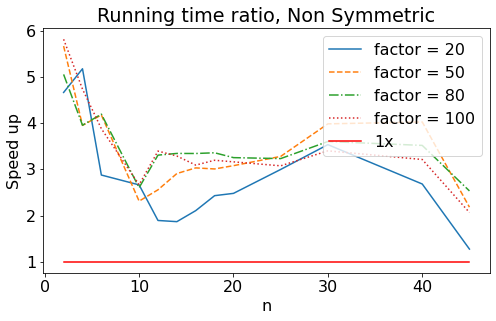

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,4.5))

i=0
plt.plot(n_dims,np.mean(time_FC[i],1)/np.mean(time_rand[i],1), '-', label = 'factor = '+str(factor[i]))
i+=1
plt.plot(n_dims,np.mean(time_FC[i],1)/np.mean(time_rand[i],1), '--', label = 'factor = '+str(factor[i]))
i+=1
plt.plot(n_dims,np.mean(time_FC[i],1)/np.mean(time_rand[i],1), '-.', label = 'factor = '+str(factor[i]))
i+=1
plt.plot(n_dims,np.mean(time_FC[i],1)/np.mean(time_rand[i],1), ':', label = 'factor = '+str(factor[i]))
    
plt.plot(n_dims, np.ones(len(n_dims)),color="red", label = "1x")
plt.legend()
plt.xlabel('n')
plt.ylabel('Speed up')
plt.title("Running time ratio, Non Symmetric")
# plt.savefig('Synthetic_factor_study_vsn_nonSymmeric.pdf', bbox_inches='tight')
plt.show()
